In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the PISA Performance Scores dataset into a DataFrame
data = pd.read_csv("OECD_PISA_data.csv")

# Display the first few rows of the dataset
print(data.head())

# Explore summary statistics and data distributions
print(data.describe())

# Check for missing values
print(data.isnull().sum())


   index LOCATION INDICATOR SUBJECT  TIME    Value
0      0      AUS  PISAMATH     BOY  2003  527.000
1      1      AUS  PISAMATH     BOY  2006  527.000
2      2      AUS  PISAMATH     BOY  2009  519.000
3      3      AUS  PISAMATH     BOY  2012  510.115
4      4      AUS  PISAMATH     BOY  2015  497.000
             index         TIME        Value
count  2087.000000  2087.000000  2087.000000
mean   1043.000000  2010.814087   487.644684
std     602.609326     5.317975    38.644532
min       0.000000  2000.000000   348.000000
25%     521.500000  2006.000000   475.000000
50%    1043.000000  2012.000000   495.000000
75%    1564.500000  2015.000000   512.000000
max    2086.000000  2018.000000   574.000000
index        0
LOCATION     0
INDICATOR    0
SUBJECT      0
TIME         0
Value        0
dtype: int64


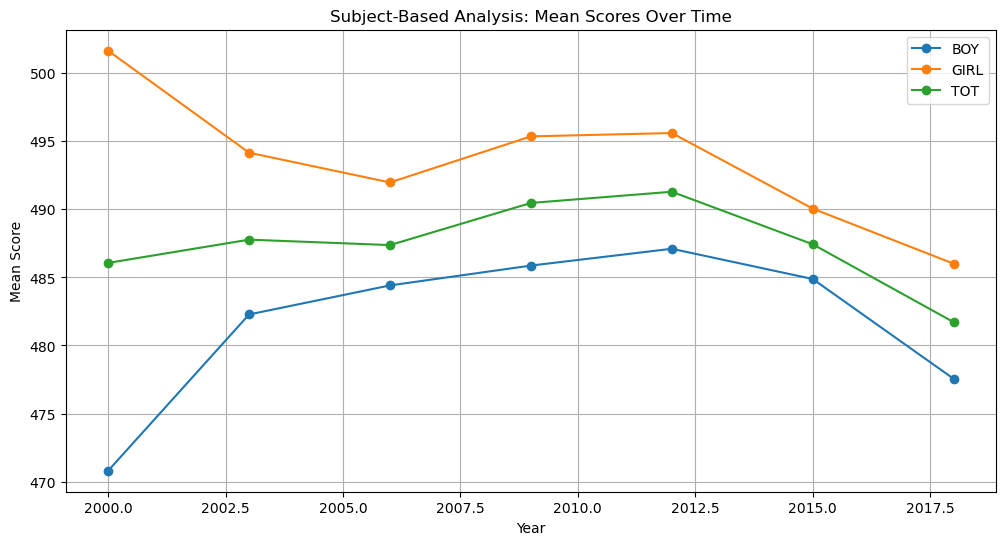

In [3]:
# Calculate mean scores for each subject across different years
subject_mean_scores = data.groupby(['TIME', 'SUBJECT'])['Value'].mean().reset_index()

# Visualize trends in mean scores for each subject over time
plt.figure(figsize=(12, 6))
for subject in data['SUBJECT'].unique():
    plt.plot(subject_mean_scores[subject_mean_scores['SUBJECT'] == subject]['TIME'], 
             subject_mean_scores[subject_mean_scores['SUBJECT'] == subject]['Value'], 
             label=subject, marker='o')

plt.title('Subject-Based Analysis: Mean Scores Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()
plt.grid(True)
plt.show()



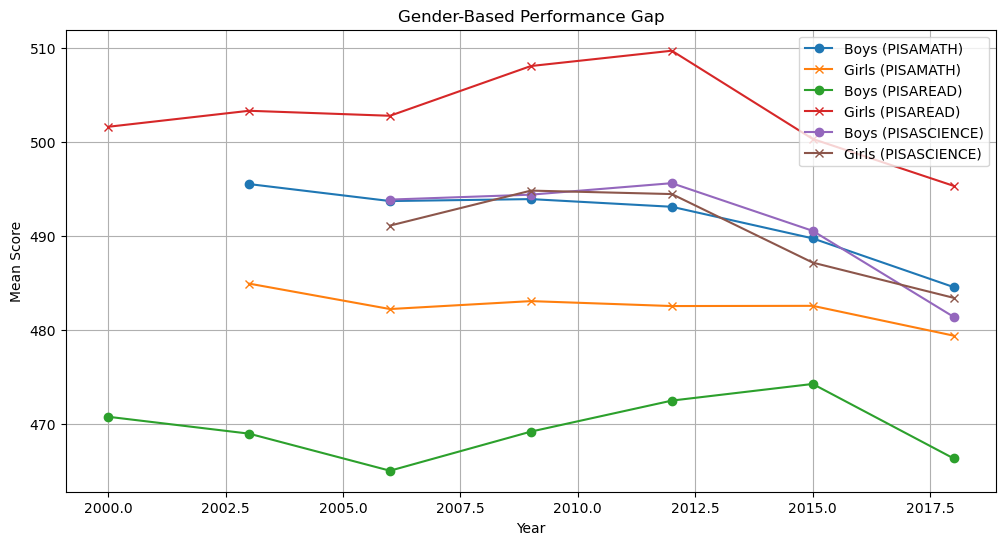

In [4]:
# Separate scores for boys and girls across all indicators
boys_scores = data[data['SUBJECT'] == 'BOY']
girls_scores = data[data['SUBJECT'] == 'GIRL']

# Calculate mean scores for each gender across different years and subjects
boys_mean_scores = boys_scores.groupby(['TIME', 'INDICATOR'])['Value'].mean().reset_index()
girls_mean_scores = girls_scores.groupby(['TIME', 'INDICATOR'])['Value'].mean().reset_index()

# Visualize gender-based performance gaps over time
plt.figure(figsize=(12, 6))
for indicator in data['INDICATOR'].unique():
    plt.plot(boys_mean_scores[boys_mean_scores['INDICATOR'] == indicator]['TIME'], 
             boys_mean_scores[boys_mean_scores['INDICATOR'] == indicator]['Value'], 
             label=f'Boys ({indicator})', marker='o')

    plt.plot(girls_mean_scores[girls_mean_scores['INDICATOR'] == indicator]['TIME'], 
             girls_mean_scores[girls_mean_scores['INDICATOR'] == indicator]['Value'], 
             label=f'Girls ({indicator})', marker='x')

plt.title('Gender-Based Performance Gap')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()
plt.grid(True)
plt.show()


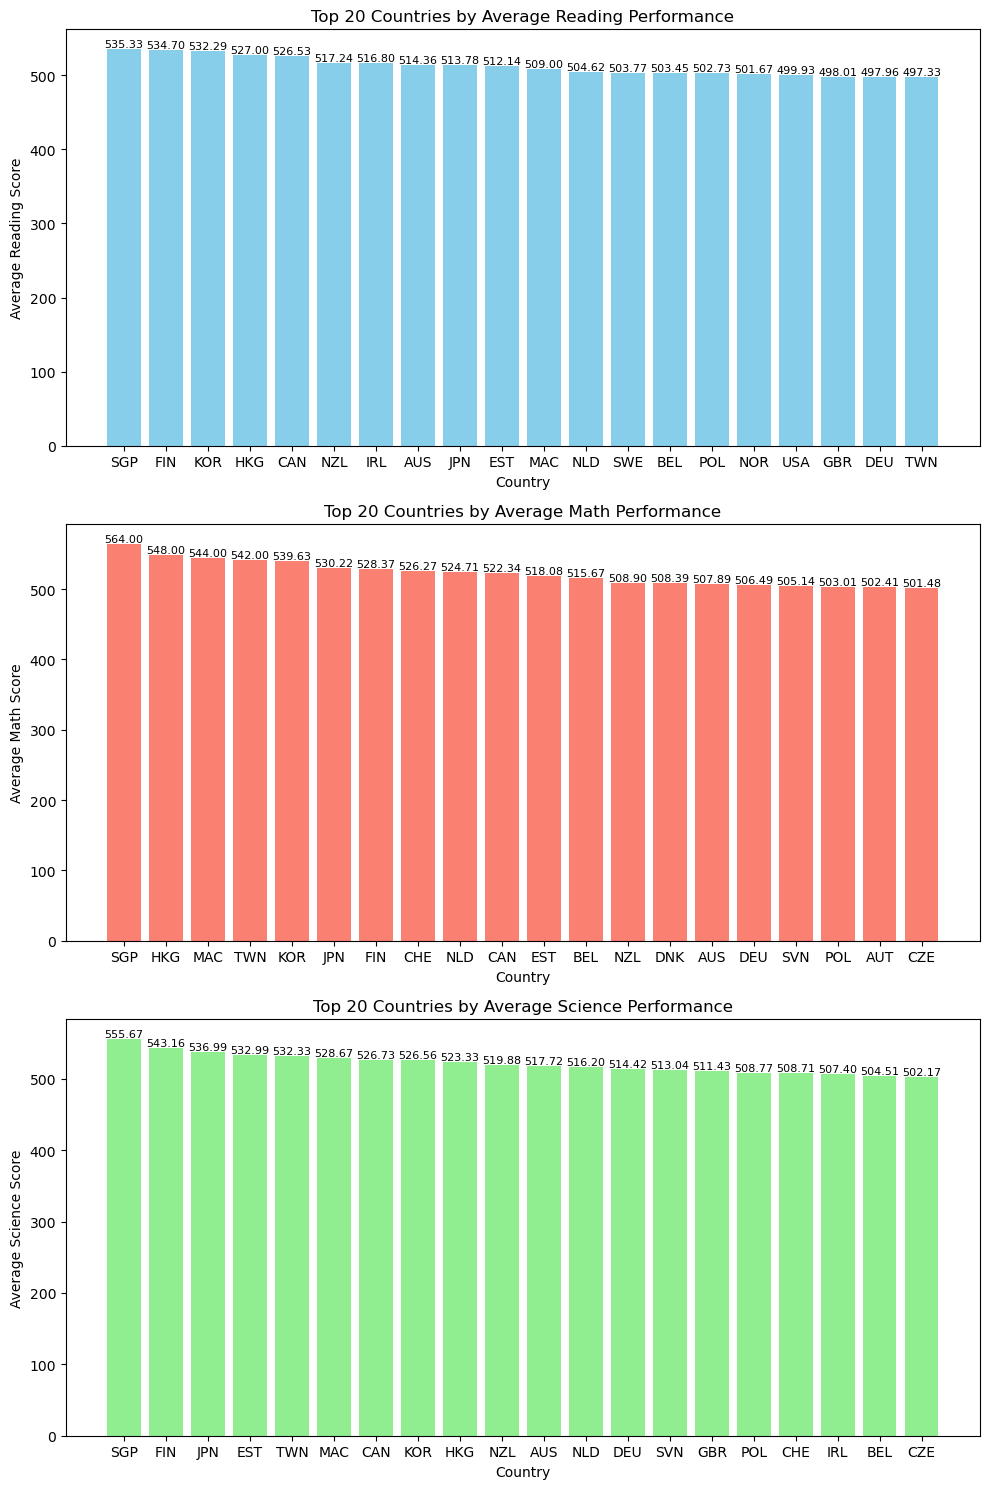

In [5]:
## Looking most successfull countries across all indicators

country_performance = data.groupby(['LOCATION', 'INDICATOR'])['Value'].mean().unstack()
# Sort countries based on average reading performance scores
top_countries_read = country_performance['PISAREAD'].sort_values(ascending=False).head(20)

# Sort countries based on average math performance scores
top_countries_math = country_performance['PISAMATH'].sort_values(ascending=False).head(20)

# Sort countries based on average science performance scores
top_countries_science = country_performance['PISASCIENCE'].sort_values(ascending=False).head(20)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot for PISAREAD
axs[0].bar(top_countries_read.index, top_countries_read.values, color='skyblue')
axs[0].set_title('Top 20 Countries by Average Reading Performance')
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Average Reading Score')

# Add exact values on top of each bar for PISAREAD
for i, score in enumerate(top_countries_read.values):
    axs[0].text(i, score, f'{score:.2f}', ha='center', va='bottom', fontsize=8)  # Adjust fontsize here

# Plot for PISAMATH
axs[1].bar(top_countries_math.index, top_countries_math.values, color='salmon')
axs[1].set_title('Top 20 Countries by Average Math Performance')
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Average Math Score')

# Add exact values on top of each bar for PISAMATH
for i, score in enumerate(top_countries_math.values):
    axs[1].text(i, score, f'{score:.2f}', ha='center', va='bottom', fontsize=8)  # Adjust fontsize here

# Plot for PISASCIENCE
axs[2].bar(top_countries_science.index, top_countries_science.values, color='lightgreen')
axs[2].set_title('Top 20 Countries by Average Science Performance')
axs[2].set_xlabel('Country')
axs[2].set_ylabel('Average Science Score')

# Add exact values on top of each bar for PISASCIENCE
for i, score in enumerate(top_countries_science.values):
    axs[2].text(i, score, f'{score:.2f}', ha='center', va='bottom', fontsize=8)  # Adjust fontsize here

# Adjust layout
plt.tight_layout()
plt.show()


In [6]:
# Filter data for OECD (OAVG) and non-OECD countries
oecd_data = data[data['LOCATION'] == 'OAVG']
non_oecd_data = data[data['LOCATION'] != 'OAVG']

# Calculate average scores for each indicator
oecd_averages = oecd_data.groupby('INDICATOR')['Value'].mean()
non_oecd_averages = non_oecd_data.groupby('INDICATOR')['Value'].mean()

# Compare the averages (descriptive statistics or visualizations)
print("Average Scores (OECD vs Non-OECD):")
print(pd.concat([oecd_averages, non_oecd_averages], axis=1))


Average Scores (OECD vs Non-OECD):
                  Value       Value
INDICATOR                          
PISAMATH     493.447529  486.732438
PISAREAD     492.547000  486.021635
PISASCIENCE  496.433667  490.309624


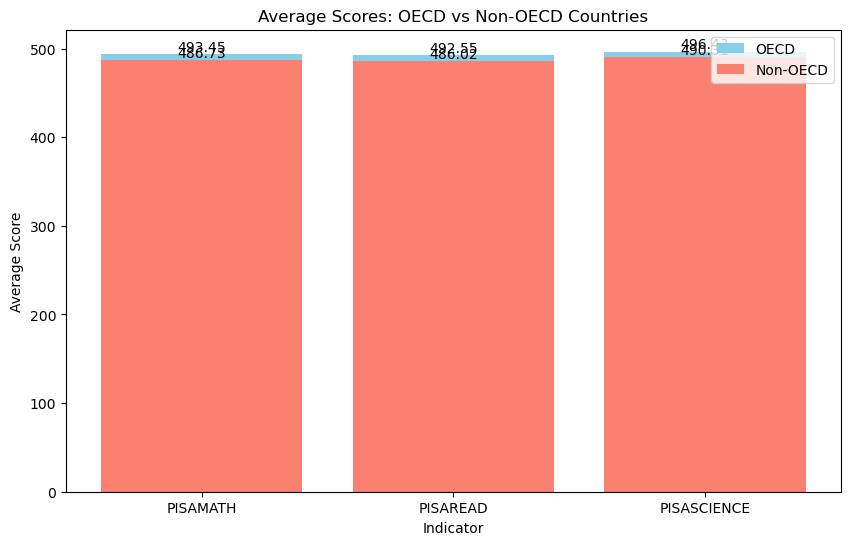

In [8]:
# Plot the results
plt.figure(figsize=(10, 6))
bar1 = plt.bar(oecd_averages.index, oecd_averages.values, color='skyblue', label='OECD')
bar2 = plt.bar(non_oecd_averages.index, non_oecd_averages.values, color='salmon', label='Non-OECD')

# Add exact values to the bars
for bar, values in zip((bar1, bar2), (oecd_averages, non_oecd_averages)):
    for i, value in enumerate(values):
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Indicator')
plt.ylabel('Average Score')
plt.title('Average Scores: OECD vs Non-OECD Countries')
plt.legend()
plt.show()


In [15]:
print(oecd_data.shape)
print(non_oecd_data.shape)

(49, 6)
(2038, 6)


In [9]:
## Realizing that classification for oecd and non-oecd countries implemented wrong,its still small part of the dataset 
##so going on with non_oecd dataframe while Im separating oecd and non-oecd countries in the code below
data[:20]

## Look aus == australia,shouldnt it be in oecd

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value
0,0,AUS,PISAMATH,BOY,2003,527.000
1,1,AUS,PISAMATH,BOY,2006,527.000
2,2,AUS,PISAMATH,BOY,2009,519.000
3,3,AUS,PISAMATH,BOY,2012,510.115
4,4,AUS,PISAMATH,BOY,2015,497.000
5,5,AUS,PISAMATH,BOY,2018,494.000
6,6,AUS,PISAMATH,GIRL,2003,522.000
7,7,AUS,PISAMATH,GIRL,2006,513.000
8,8,AUS,PISAMATH,GIRL,2009,509.000
9,9,AUS,PISAMATH,GIRL,2012,497.821


In [10]:
oecd_list = ['AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 'LVA', 'LTU', 'LUX', 'MEX', 'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 'USA']


oecd_real = data[data['LOCATION'].isin(oecd_list)]
non_oecd_real = data[~data['LOCATION'].isin(oecd_list)]

oecd_averages1 = oecd_real.groupby('INDICATOR')['Value'].mean()
non_oecd_averages1 = non_oecd_real.groupby('INDICATOR')['Value'].mean()

print(oecd_real)


      index LOCATION    INDICATOR SUBJECT  TIME    Value
0         0      AUS     PISAMATH     BOY  2003  527.000
1         1      AUS     PISAMATH     BOY  2006  527.000
2         2      AUS     PISAMATH     BOY  2009  519.000
3         3      AUS     PISAMATH     BOY  2012  510.115
4         4      AUS     PISAMATH     BOY  2015  497.000
...     ...      ...          ...     ...   ...      ...
2066   2066      COL  PISASCIENCE    GIRL  2015  411.000
2067   2067      COL  PISASCIENCE    GIRL  2018  407.000
2084   2084      LTU  PISASCIENCE     TOT  2018  482.000
2085   2085      LTU  PISASCIENCE     BOY  2018  479.000
2086   2086      LTU  PISASCIENCE    GIRL  2018  485.000

[1829 rows x 6 columns]


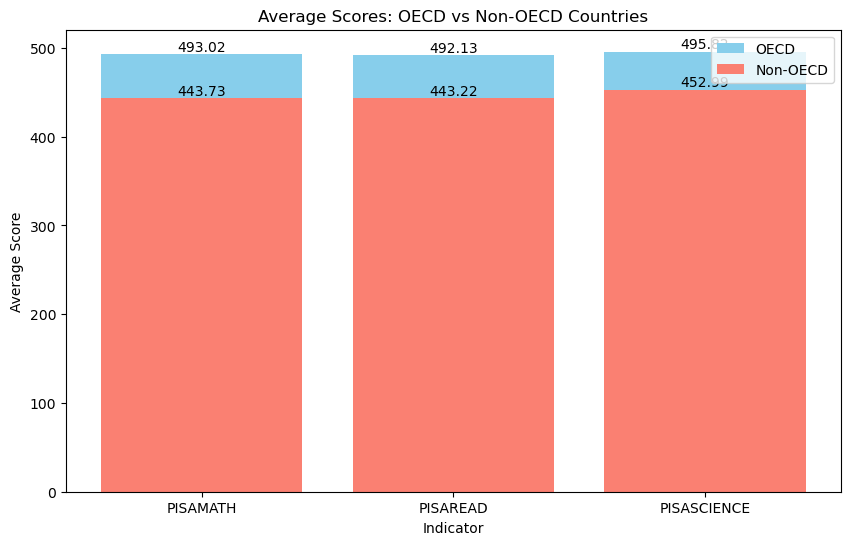

In [11]:
# Plot the results
plt.figure(figsize=(10, 6))
bar1 = plt.bar(oecd_averages1.index, oecd_averages1.values, color='skyblue', label='OECD')
bar2 = plt.bar(non_oecd_averages1.index, non_oecd_averages1.values, color='salmon', label='Non-OECD')

# Add exact values to the bars
for bar, values in zip((bar1, bar2), (oecd_averages1, non_oecd_averages1)):
    for i, value in enumerate(values):
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Indicator')
plt.ylabel('Average Score')
plt.title('Average Scores: OECD vs Non-OECD Countries')
plt.legend()
plt.show()
